# Aula 01.4 - Desbalanceamento e Redundância

# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Dados estruturados e não estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Desbalanceamento e Redundância</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

--- 

![desbalanceamento](imagens/desbalanceamento.jpg)

**Desbalanceamento ocorre quando** temos mais dados representando certos  eventos, e muito menos de outros.

Em problemas de **regressão** por exemplo isso significa:
- há mais dados em um determinado intervalo de valores do que em outros

Em problemas de **classificação**
- uma variável categórica possui frequência de valores muito diferentes entre si

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("./dados/TACTD-01-Desbalanceamento.csv")

print("Número de observacoes na base de dados: ", data.shape[0])

Número de observacoes na base de dados:  76


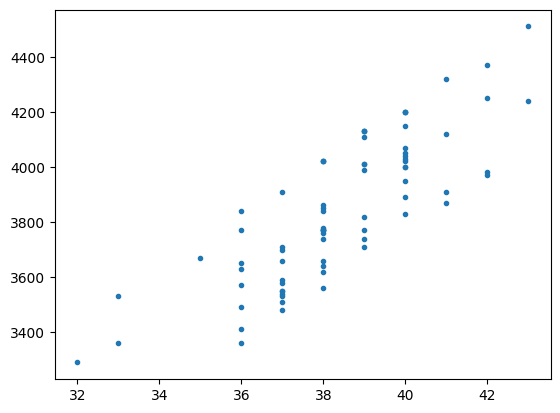

In [2]:
plot = plt.plot(data['Gestational age'], data['Weight'], '.')

No intervalo entre 32 e 35 temos menos observações do que de 36 e superior



In [3]:
data['Sex'].value_counts()

F    58
M    18
Name: Sex, dtype: int64

In [4]:
cont = data['Sex'].value_counts()

# relacao entre classe majoritaria e minoritaria
ratio = np.round((cont[1]/cont[0])*10,1)

# percentual
perce = (np.min(cont)/data.shape[0])*100

In [5]:
print('Problema com relaçao 1:'+str(ratio))
print('Classe minoritária com frequência: %.1f%%' % (perce)) 

Problema com relaçao 1:3.1
Classe minoritária com frequência: 23.7%


O **desbalanceamento** pode representar:
* a probabilidade *a priori* dos dados, ou seja, a frequência real dos eventos 
* um problema de amostragem do conjunto de dados

A depender do caso, será preciso coletar mais dados ou recorrer a métodos para compensar esse desbalanceamento!

---
## Redundância

A redundância mais comum ocorre em:
* linhas duplicadas
* atributos constantes

In [6]:
data[data.duplicated()]

,Sex,Gestational age,Month,Year,Weight,Hospital,Date
9,F,38,12,2016,3770,St Mary,201612
23,F,38,12,2016,3770,St Mary,201612
40,M,38,2,2017,4020,St Mary,20172
57,F,40,3,2017,4000,St Mary,20173
62,F,39,4,2017,4010,St Mary,20174


In [7]:
for var in data:
    print(var)
    print('Valores únicos:', data[var].unique(), '\n')

Sex
Valores únicos: ['F' 'M'] 

Gestational age
Valores únicos: [38 39 42 36 40 37 41 33 43 32 35] 

Month
Valores únicos: [12  1  2  3  4  5] 

Year
Valores únicos: [2016 2017] 

Weight
Valores únicos: [3740 4130 4250 3990 3760 3360 4020 3770 4150 4040 3630 4200 3710 3510
 3910 4110 3860 3970 3840 3480 3950 3410 3870 3660 3570 3590 4120 3640
 3530 3540 3650 4240 4000 3560 4370 3700 3820 3850 3290 3890 3550 3490
 3620 4510 4050 4010 3830 4320 3980 4030 3780 3580 4070 3670] 

Hospital
Valores únicos: ['St Mary'] 

Date
Valores únicos: [201612  20171  20172  20173  20174  20175] 



Linhas duplicadas e atributos contendo o mesmo valor para todas as linhas são comumente desnecessários e podem ser removidos

---
## Resumo

* Desbalanceamento ocorre naturalmente ou ocasionado por problemas de amostragem
    * Pode afetar intervalos de valores ou frequência de determinados valores
* Redundância de dados ocorre pela duplicação de instâncias/linhas ou irrelevância de atributos/variáveis com relação a adicionar informação útil para análise do problema